Zafrin Dhali<br> 
A12122669<br> 
Cogs 118a<br>
<br> 
## 1 
<p>
1. Which of the following statement(s) is/are true regarding the SVM classifier?<br>
<b>A. The margin definition in the SVM formulation can be considered as a regularization
term to prevent overfitting.</b><br>
B. Any function can be used a kernel function.<br>
C. Using a valid kernel, an SVM classifier can be trained without knowing the
feature values for each sample.<br>
<b>D. The so-called “support vectors” refer to the positive and negative planes.</b><br></p>

<p>
2. Which of the following statement(s) is/are true regarding the decision tree
classifier?<br>
A. When training a decision tree classifier, the depth of the tree goes linearly
with respect to the number of training samples.<br>
<b>B. The training objective function for a decision tree classifier has in general no
analytic form to optimize for.</b><br>
<b>C. Tree pruning can be used to prevent overfitting.</b><br>
<b>D. In general, the deeper a decision tree is, the more complex the decision
boundary is.</b><br></p>


# Problem 2, 3, 4 

## 5 Decision Tree

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 1) Load data.

X_and_Y = np.load('ionosphere.npy').astype(np.float32) # Load data from file.
np.random.shuffle(X_and_Y)   # Shuffle the data.
X = X_and_Y[:, 0:-1]         # First column to second last column: Features (numerical values) 
Y = X_and_Y[:, -1]           # Last column: Labels (0 or 1)
print(X.shape, Y.shape)      # Check the shapes.

In [ ]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)

X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

In [ ]:
# 3) Perform grid search for best D using sklearn

#######FILL IN HERE #########


param_grid={""}

# 1) Implement a simple cross-validation.
def simple_cross_validation(X_train_val, Y_train_val, D, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    number = len(Y_train_val)//fold
    for i in range(fold):
        X_test = X_train_val[i*number:(i+1)*number,:]
        Y_test = Y_train_val[i*number:(i+1)*number]
        X_train = np.delete(X_train_val, slice(i*number,(i+1)*number),axis = 0)
        Y_train = np.delete(Y_train_val, slice(i*number,(i+1)*number),axis = 0)
        #classifier
        clf_tree =tree.DecisionTreeClassifier(criterion="entropy", max_depth=D)

        clf_tree.fit(X_train,Y_train)
        train_acc = clf_tree.score(X_train,Y_train)
        val_acc = clf_tree.score(X_test,Y_test)
        #__________________
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [ ]:
def simple_GridSearchCV_fit(X_train_val, Y_train_val, D_list, fold):
    """
    A simple grid search function for C and gamma with cross-validation. 
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C_list:      The list of C values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of C and gamma are
    included in the matrix. Shape: (len(C_list),1)
    """
    val_acc_matrix   = np.zeros((len(D_list),1))
    train_acc_matrix = np.zeros((len(D_list),1))
    for i in range(len(D_list)):
        val_acc_matrix[i], train_acc_matrix[i]= simple_cross_validation( \
            X_train_val, Y_train_val, D_list[i], fold)
    return val_acc_matrix, train_acc_matrix

In [ ]:
D_list=[1,2,3,4,5]

In [ ]:
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit(X_train_val, Y_train_val, D_list, 5)

In [ ]:
# 4) Draw heatmaps for result of grid search and find 
#    optimal D for validation set.
def draw_heatmap_linear(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
    
#######FILL IN HERE #########  


draw_heatmap_linear(train_acc_matrix, 'train accuracy', D_list)
draw_heatmap_linear(val_acc_matrix, 'val accuracy',  D_list)

In [ ]:
# 5) Use the optimal D to calculate the test accuracy.
#optimal D = 3
#######FILL IN HERE #########
#classifierf
clf_tree =tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_tree.fit(X_train_val,Y_train_val)
train_acc = clf_tree.score(X_train_val,Y_train_val)
test_acc = clf_tree.score(X_test,Y_test)
print ("Test Accuracy:", test_acc)

## 6 K-Nearest Neighbors

In [2]:
from scipy.spatial import distance
import heapq
from statistics import mode
import random


In [3]:
# 1) Load data.

X_and_Y = np.load('ionosphere.npy').astype(np.float32) # Load data from file.
np.random.seed(0)
np.random.shuffle(X_and_Y)   # Shuffle the data.
X = X_and_Y[:, 0:-1]         # First column to second last column: Features (numerical values) 
Y = X_and_Y[:, -1]           # Last column: Labels (0 or 1)
print(X.shape, Y.shape)      # Check the shapes.

(351, 34) (351,)


In [4]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)

X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(280, 34) (71, 34) (280,) (71,)


In [5]:
# 3) Implement the k-NN.
class simple_KNeighborsClassifier(object):
    def __init__(self, k):
        """
        k-NN initialization.
            k: Number of nearest neighbors.
        """
        self.k = k
    def fit(self, X_train, Y_train):
        """
        k-NN fitting function.
            X_train: Feature vectors in training set.
            Y_train: Labels in training set.
        """
        self.X_train = X_train
        self.Y_train = Y_train
        
        
    def predict(self, X_pred):
        """
        k-NN prediction function.
            X_pred: Feature vectors in training set.
        Return the predicted labels for X_pred. Shape: (len(X_pred), )
        """
        X_train=self.X_train
        Y_train=self.Y_train
        k=self.k
        list_of_euc_distances=[]
        Y_pred_list=[]
        for r in range(len(X_pred)):
            for i in (range(len(X_train))):
                dist=distance.euclidean(X_pred[r], X_train[i])
                list_of_euc_distances.append([dist,i])
                euc_dist_sorted=(sorted(list_of_euc_distances, key = lambda x: x[0]))
            top_k_neighbors=euc_dist_sorted[0:k]
            top_k_y_labels=[]
            for i in range(k):
                index=top_k_neighbors[i][1]
                top_k_y_labels.append(Y_train[index])
            count_a=0
            count_b=0
            for i in range(len(top_k_y_labels)):
                if top_k_y_labels[i]==0:
                    count_a+=1
                if top_k_y_labels[i]==1:
                    count_b+=1
            if count_a>count_b:
                Y_pred=-1
            if count_b>count_a:
                Y_pred=1
            if count_b==count_a:
                Y_pred=random.choice([-1,1])
            #print ((sorted(list_of_euc_distances, key = lambda x: x[0])))
            #print(top_k_y_labels, Y_pred)
            Y_pred_list.append(Y_pred)
            #print (count_a, count_b, Y_pred)
        
    
                

            
        
        #######FILL IN HERE #########
        
        return Y_pred_list
    def score(self, Y_pred_list, Y_Labels):
        accuracy_list=[]
        for i in range(len(Y_pred_list)):
            if Y_pred_list[i]==Y_Labels[i]:
                score=1
            else:
                score=0
            accuracy_list.append(score)
        accuracy=sum(accuracy_list)/len(accuracy_list)
        return accuracy

In [6]:
KNN=simple_KNeighborsClassifier(5)
KNN.k
KNN.fit(X_train_val, Y_train_val)
Y_pred_list=KNN.predict(X_train_val)


In [7]:
KNN.score(Y_pred_list, Y_train_val)

0.38571428571428573

In [8]:
# 4) Implement the cross-validation.
def simple_cross_validation(X_train_val, Y_train_val, k, fold):
    """
    A simple cross-validation function for k-NN.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    k:           Parameter k for k-NN.
    fold:        The number of folds to do the cross-validation.
    
    Return the `average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    number = len(Y_train_val)//fold

    for i in range(fold):
        #######FILL IN HERE #########
        
        X_test = X_train_val[i*number:(i+1)*number,:]
        Y_test = Y_train_val[i*number:(i+1)*number]
        X_train = np.delete(X_train_val, slice(i*number,(i+1)*number),axis = 0)
        Y_train = np.delete(Y_train_val, slice(i*number,(i+1)*number),axis = 0)
        KNN=simple_KNeighborsClassifier(k)
        KNN.fit(X_train, Y_train)
        Y_pred_list=KNN.predict(X_train)
        train_acc=KNN.score(Y_pred_list, Y_train)
        Y_pred_list=KNN.predict(X_test)
        val_acc=KNN.score(Y_pred_list, Y_test)
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [9]:
vac_accuracy, train_accuracy=simple_cross_validation(X_train_val, Y_train_val, 5, 3)

In [10]:
# 5) Implement the grid search function.

def simple_GridSearchCV_fit(X_train_val, Y_train_val, k_list, fold):
    """
    A simple grid search function for k with cross-validation in k-NN.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    k_list:      The list of k values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of k are included in the array. 
    Shape: (len(k_list), )
    """
    val_acc_array = np.zeros(len(k_list))
    train_acc_array = np.zeros(len(k_list))
    for i in range(len(k_list)):
        val_acc_array[i], train_acc_array[i] = simple_cross_validation(
            X_train_val, Y_train_val, k_list[i], fold)
    return val_acc_array, train_acc_array

In [11]:
# 6) Perform grid search.

k_list = [1,2,3,4,5,6]
val_acc_array, train_acc_array = simple_GridSearchCV_fit(X_train_val, Y_train_val, k_list, 3)

In [12]:
# 7) Draw heatmaps for result of grid search and find 
#    best k on validation set.

def draw_heatmap_knn(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

#######FILL IN HERE #########

# Hint:
# You can use the draw_heatmap_knn() to draw a heatmap to visualize 
# the accuracy w.r.t. k. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],[0.7]])
# demo_k_list     = [1, 2]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_k_list)
#



In [13]:
val_acc_array=val_acc_array.reshape(-1,1)
train_acc_array=train_acc_array.reshape(-1,1)


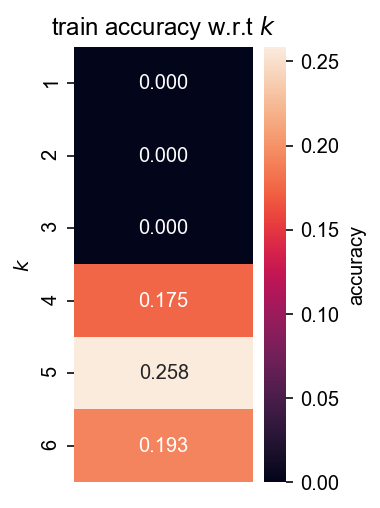

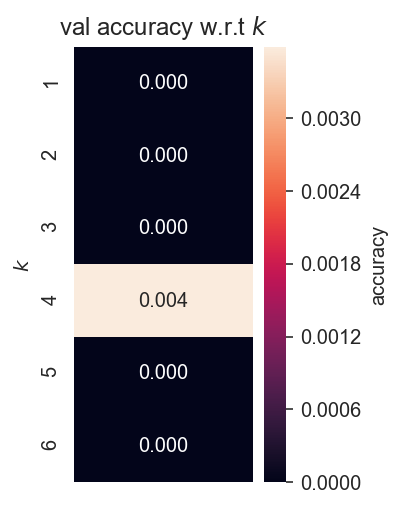

In [14]:
draw_heatmap_knn(train_acc_array, 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array, 'val accuracy',  k_list)

In [15]:
# 8) Use the best k to calculate the test accuracy.

#######FILL IN HERE #########
# best k for train 5 
#best k for val 4 

KNN=simple_KNeighborsClassifier(4)
KNN.k
KNN.fit(X_train_val, Y_train_val)
Y_pred_list=KNN.predict(X_test)

In [16]:
KNN.score(Y_pred_list, Y_test)

0.0

## 7 (Bonus) SVM

In [ ]:
import numpy as np
from numpy.linalg import inv

from tqdm import *
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# ---- set the figure size
plt.rcParams['figure.figsize'] = 8,8

# ---- load the data Q3_data.txt
file_path = 'Q4_data.txt'

data = np.genfromtxt(file_path,dtype="f8,f8,f8,f8,S20",
delimiter=',',names=['x1','x2','x3','x4','class'])


np.random.shuffle(data)               # Shuffle the data.

# ---- split the data points into the training set and test set
train_data = np.concatenate((data[15:50],data[65:]))
test_data = np.concatenate((data[:15],data[50:65]))
X_train = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in train_data])
X_train=X_train[..., 0:4]
X_train=np.delete(X_train, 2,1)

X_test = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in test_data])
X_test=X_test[..., 0:4]
X_test=np.delete(X_test, 2,1)


num_train = len(X_train)
num_test = len(X_test)

print("number of training data is "+str(num_train))
print("number of testing data is "+str(num_test))

# ---- convert the class names into categorical labels.
le = LabelEncoder()
le.fit(data['class'])
y_train = le.transform(train_data['class']).reshape(num_train,1)
for i in range(len(y_train)):
    if y_train[i]==0:
        y_train[i]=-1

y_test = le.transform(test_data['class']).reshape(num_test,1)        
for i in range(len(y_test)):
    if y_test[i]==0:
        y_test[i]=-1        
        

# ---- initialize the weights and bias to 0
# ---- we absorb the bias into the weights

#Given N and Alpha from initial Problem

w = np.zeros((3,1))
n_iter = 1000
alpha =5
train_err = []
W_diff=.00001


In [ ]:
def SVM_Classifier(X_, Y_, w, n_iter, alpha, train_err,W_diff):
    out=[]
    for i in range(n_iter):
        for i, val in enumerate(X_):
            val1=np.dot(X_[i],w)
            if (Y_[i]*val1 < 1).any():
                w_new= w + alpha*((Y_[i]*X_[i])-(2*(1/n_iter)*w))
            else:
                w_new= w + alpha*(2*(1/n_iter)*w)
        if np.linalg.norm(w_new - w, ord = 1) < W_diff:
            print(i)
            break
        w = w_new
    for i, val in enumerate(X_):
        out.append(np.dot(X_[i],w))
    return w, out
    

In [ ]:
w, out=SVM_Classifier(X_train, y_train,w, n_iter, alpha, train_err,W_diff)

In [ ]:
w[0]

In [ ]:
def score( X_, w, Y_Labels):
    Y_pred_list=[]
    for i, val in enumerate (X_):
        r=X_[i].reshape(-1,1)
        p=w[0].reshape(-1,1)
        if np.dot(r.T, p).any()>0:
            Y_pred_list.append(1)
        else:
            Y_pred_list.append(-1)
    accuracy_list=[]
    for i in range(len(Y_pred_list)):
        if Y_pred_list[i]==Y_Labels[i]:
            score=1
        else:
            score=0
        accuracy_list.append(score)
    accuracy=sum(accuracy_list)/len(accuracy_list)
    return accuracy

In [ ]:
accuracy=score( X_train, w, y_train)
accuracy

# Find optimal parameters

In [ ]:
n_iter_list=[1000, 10000]
alpha_list=[.2,.5,1,2,3,5,8]

In [ ]:
for i in n_iter_list:
    n_iter=i
    for a in alpha_list:
        alpha=a
        w, out=SVM_Classifier(X_train, y_train,w, n_iter, alpha, train_err,  W_diff)  
        accuracy=score( X_train, w, y_train)
        print ( " N Val: Alpha Val : Accuracy", n_iter, a, accuracy )


<p> From the analysis above, it was found that changing the iteration number and learning rate did not significantly change the accuracy of the classifier. Accuracy was "stuck" at 50% for alot of perturbations. It was found that the test/train split of the data and shuffling the data  either increased accuracy where the data was split better or did a little worse if the data set did not split evenly. </p>

# Change in Data Split


In [ ]:
import numpy as np
from numpy.linalg import inv

from tqdm import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# ---- set the figure size
plt.rcParams['figure.figsize'] = 8,8

# ---- load the data Q3_data.txt
file_path = 'Q4_data.txt'

data = np.genfromtxt(file_path,dtype="f8,f8,f8,f8,S20",
delimiter=',',names=['x1','x2','x3','x4','class'])


np.random.shuffle(data)               # Shuffle the data.
# ---- split the data points into the training set and test set
train_data = np.concatenate((data[:80],data[95:]))
test_data = np.concatenate((data[80:90],data[90:95]))


X_train = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in train_data])
X_train=X_train[..., 0:4]
X_train=np.delete(X_train, 2,1)

X_test = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in test_data])
X_test=X_test[..., 0:4]
X_test=np.delete(X_test, 2,1)


num_train = len(X_train)
num_test = len(X_test)

print("number of training data is "+str(num_train))
print("number of testing data is "+str(num_test))

# ---- convert the class names into categorical labels.
le = LabelEncoder()
le.fit(data['class'])
y_train = le.transform(train_data['class']).reshape(num_train,1)
for i in range(len(y_train)):
    if y_train[i]==0:
        y_train[i]=-1

y_test = le.transform(test_data['class']).reshape(num_test,1)        
for i in range(len(y_test)):
    if y_test[i]==0:
        y_test[i]=-1        
        

# ---- initialize the weights and bias to 0
# ---- we absorb the bias into the weights

#Given N and Alpha from initial Problem

w = np.zeros((3,1))
n_iter = 1000
alpha =5
train_err = []

In [ ]:
w, out=SVM_Classifier(X_train, y_train,w, n_iter, alpha, train_err,W_diff)

In [ ]:
accuracy=score( X_train, w, y_train)
accuracy

In [ ]:
for i in n_iter_list:
    n_iter=i
    for a in alpha_list:
        alpha=a
        w, out=SVM_Classifier(X_train, y_train,w, n_iter, alpha, train_err,W_diff)  
        accuracy=score( X_train, w, y_train)
        print ( " N Val: Alpha Val : Accuracy", n_iter, a, accuracy )


In [ ]:
accuracy=score( X_test, w, y_test)
print ("Testing Accuracy with optimal W", accuracy)
print ("Optimal W", w[0])

In [ ]:
color=["g", "r"]
color_list=[]
cdict = {1: 'red', -1: 'blue'}

for i in range(len(y_train)):
    if y_train[i]==-1:
        plt.scatter(X_train[i,1], X_train[i,2], c="g")
    if y_train[i]==1:
        plt.scatter(X_train[i,1], X_train[i,2], c="r")
#plt.plot(x, w[0,0]+ w[0,1]* x + w[0,2]*x , 'b', label="tada")

plt.title("Scatter plot train X : Feature 1 and Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
x=np.linspace(100,1000)
y=np.linspace(100,500)
for i in range(len(y_train)):
    if y_train[i]==-1:
        plt.scatter(X_train[i,1], X_train[i,2], c="g")
    if y_train[i]==1:
        plt.scatter(X_train[i,1], X_train[i,2], c="r")

plt.plot(w[0,1]* x , w[0,0]+  w[0,2]*y , 'b', label="Decision Boundary")
plt.title("Scatter plot test X : Feature 1 and Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
for i in range(len(y_test)):
    if y_train[i]==-1:
        plt.scatter(X_test[i,1], X_test[i,2], c="g")
    if y_train[i]==1:
        plt.scatter(X_test[i,1], X_test[i,2], c="r")
plt.title("Scatter plot test X : Feature 1 and Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
accuracy=score( X_train, w, y_train)
print ("Training accuracy: %s " % accuracy)
accuracy=score( X_test, w, y_test)
print ("Testing accuracy: %s " % accuracy)